Predictions:  [0.044775304209310404, 0.006265843819382316, 0.8425324500734763, 0.7683128033917124, 0.5520987719009546]
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.1667 - loss: 0.7109 - val_accuracy: 0.5000 - val_loss: 0.6418
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2667 - loss: 0.6855 - val_accuracy: 0.5000 - val_loss: 0.6410
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7333 - loss: 0.6522 - val_accuracy: 0.5000 - val_loss: 0.6399
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6394 - val_accuracy: 0.5000 - val_loss: 0.6393
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6268 - val_accuracy: 0.5000 - val_loss: 0.6390
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6146 - val_accuracy: 0.5000 - val_loss: 0.6389
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6140 - val_accuracy: 0.5000 - val_loss: 0.6394
E

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2424 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.1874 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.2332 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1802 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1696 - val_accuracy: 0.5000 - val_loss: 0.7007
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2152 - val_accuracy: 0.5000 - val_loss: 0.7020
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1634 - val_accuracy: 0.5000 - val_loss: 0.7053
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1724 - val_accuracy: 0.5000 - val_loss: 0.70

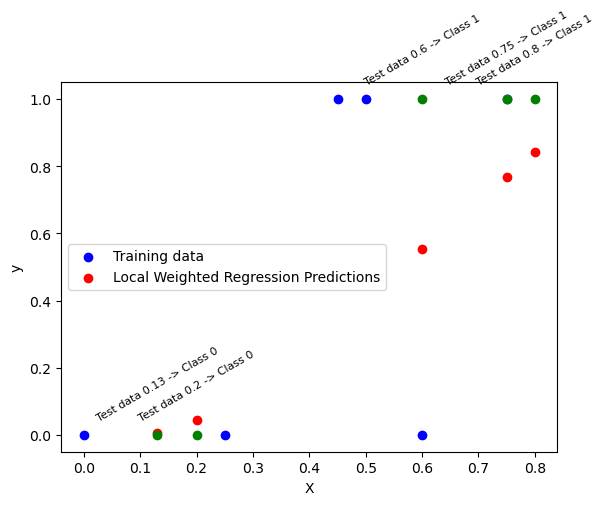

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

# داده‌های آموزشی
X_train = np.array([0.25, 0.5, 0.45, 0.75, 0.6, 0])
y_train = np.array([0, 1, 1, 1, 0, 0])

# داده‌های تست
X_test = np.array([0.2, 0.13, 0.8, 0.75, 0.6])

# تابع وزن‌دهی محلی
def local_weight(x, X_train, tau):
    return np.exp(-(X_train - x)**2 / (2 * tau**2))

# تابع هزینه J(theta)
def compute_cost(theta, X_train, y_train, weights):
    m = len(y_train)
    predictions = X_train.dot(theta)
    cost = (1 / (2 * m)) * np.sum(weights * (predictions - y_train)**2)
    return cost

# گرادیان کاهشی برای بدست آوردن theta‌ها
def gradient_descent(X_train, y_train, weights, alpha, num_iters):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1])
    cost_history = []

    for i in range(num_iters):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        gradient = (1 / m) * (X_train.T.dot(weights * errors))
        theta -= alpha * gradient
        cost = compute_cost(theta, X_train, y_train, weights)
        cost_history.append(cost)

    return theta, cost_history

# آماده‌سازی داده‌های آموزشی (افزودن ستون بایاس)
X_train_b = np.c_[np.ones(len(X_train)), X_train]

# پارامترهای مدل
tau = 0.1
alpha = 0.01
num_iters = 1000

# پیش‌بینی برای هر نمونه تست
predictions = []

for x in X_test:
    weights = local_weight(x, X_train, tau)
    theta, cost_history = gradient_descent(X_train_b, y_train, weights, alpha, num_iters)
    prediction = np.array([1, x]).dot(theta)
    predictions.append(prediction)

# چاپ نتایج پیش‌بینی
print("Predictions: ", predictions)

# تبدیل پیش‌بینی‌های رگرسیون به DataFrame
pred_train_df = []

for x in X_train:
    weights = local_weight(x, X_train, tau)
    theta, _ = gradient_descent(X_train_b, y_train, weights, alpha, num_iters)
    prediction = np.array([1, x]).dot(theta)
    pred_train_df.append(prediction)

pred_train_df = np.array(pred_train_df).reshape(-1, 1)
pred_test_df = np.array(predictions).reshape(-1, 1)

# ترکیب داده‌های ورودی جدید با برچسب‌ها
train_data = pd.DataFrame(np.hstack((pred_train_df, y_train.reshape(-1, 1))), columns=['regression_output', 'target'])
test_data = pd.DataFrame(np.hstack((pred_test_df, np.zeros(len(pred_test_df)).reshape(-1, 1))), columns=['regression_output', 'target'])

# آموزش شبکه عصبی برای دسته‌بندی

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(train_data[['regression_output']])
y_train_nn = train_data['target']

# ایجاد مدل شبکه عصبی دو لایه
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(32, activation='relu'))  # افزایش تعداد نرون‌ها در لایه مخفی
model.add(Dense(1, activation='sigmoid'))  # لایه خروجی

# کامپایل مدل
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# آموزش مدل
model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=1, validation_split=0.2)

# آماده‌سازی داده‌های تست برای پیش‌بینی با شبکه عصبی
X_test_nn = scaler.transform(test_data[['regression_output']])
y_test_nn = test_data['target']

# پیش‌بینی دسته‌ها برای داده‌های تست
predictions_nn = model.predict(X_test_nn)
predicted_classes = (predictions_nn > 0.5).astype(int)

# نمایش دسته‌های پیش‌بینی شده
print("Predicted Classes: ", predicted_classes)

# نمایش داده‌ها و پیش‌بینی‌ها
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, predictions, color='red', label='Local Weighted Regression Predictions')

# نمایش داده‌های تست همراه با دسته‌بندی‌های پیش‌بینی شده
for i, x in enumerate(X_test):
    plt.scatter(x, predicted_classes[i], color='green')
    plt.annotate(f'Test data {x} -> Class {predicted_classes[i][0]}', 
                 (x, predicted_classes[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=30)

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
